In [4]:
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
from scipy.optimize import fmin_tnc, check_grad

In [5]:
data = pd.read_csv("./ex2/ex2data1.txt", header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [161]:
X = data.iloc[:,:2]
y = data.iloc[:,-1][:,np.newaxis]

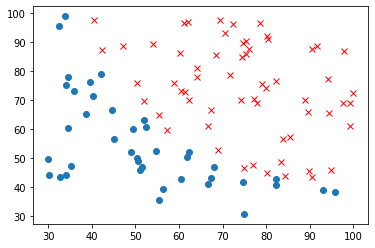

In [7]:
pl.plot(X.loc[(y==1).flatten(), 0], X.loc[(y==1).flatten(),1], 'rx')
pl.plot(X.loc[(y==0).flatten(), 0], X.loc[(y==0).flatten(),1], 'o')

In [8]:
X = pd.concat([pd.DataFrame(np.ones((y.shape[0],1))), X],axis=1,ignore_index=True)
X.head()

,0,1,2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


In [71]:
initial_theta = pd.DataFrame(np.zeros(3))
# initial_theta = initial_theta*0.001
initial_theta.head()
type(initial_theta)

pandas.core.frame.DataFrame

In [88]:
def sigmoid(X, theta):
    t = pd.DataFrame(theta)
    bottom_part = (1+ np.exp(-1*(X.dot(t))))
    m = X.shape[0]
    return 1/bottom_part if bottom_part[0][0] > 0 else pd.DataFrame(np.zeros(m))

In [90]:
def costFunction(theta, X, y):
    m = y.shape[0]
    r_s = sigmoid(X,theta)
    J = (1/m)*(-y.T.dot(np.log(r_s))-((1-y).T.dot(np.log(1-r_s))))

    return J[0]

In [98]:
def gradientDescent(theta, X, y):
    m = y.shape[0]
    r_s = sigmoid(X,theta)
    return ((1/m)*(X.T.dot(r_s-y.reshape(m,1)))).T

In [117]:
check_grad(costFunction, gradientDescent, initial_theta[0].to_list(), X, y)

1.7320508075688772

In [118]:
J = costFunction(initial_theta[0].to_list(),X,y.flatten())
J

0.6931471805599453

In [119]:
grad = gradientDescent(initial_theta,X,y.flatten())
grad

,0,1,2
0,-0.1,-12.009217,-11.262842


In [120]:
new_theta = fmin_tnc(func=costFunction, x0=initial_theta, args=(X,y.flatten()), fprime=gradientDescent)
new_theta

(array([-25.16131866,   0.20623159,   0.20147149]), 36, 0)

In [158]:
plotX = pd.DataFrame([X[1].min()-2, X[1].max()+2])
ploty = (-1/new_theta[0][2])*(new_theta[0][1]*plotX+new_theta[0][0])

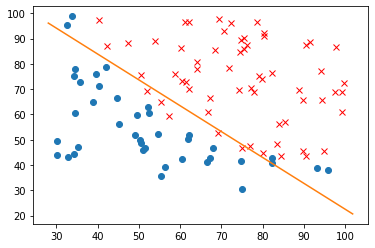

In [159]:
pl.plot(X.loc[(y==1).flatten(), 1], X.loc[(y==1).flatten(),2], 'rx')
pl.plot(X.loc[(y==0).flatten(), 1], X.loc[(y==0).flatten(),2], 'o')
pl.plot(plotX,ploty)

In [139]:
predict = sigmoid(pd.DataFrame([1,45,85]).transpose(),new_theta[0])
predict

,0
0,0.776291


---

In [564]:
data2 = pd.read_csv("./ex2/ex2data2.txt", header=None)
data2.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [565]:
X = data2.iloc[:,:2]
y = data2.iloc[:,-1][:,np.newaxis]

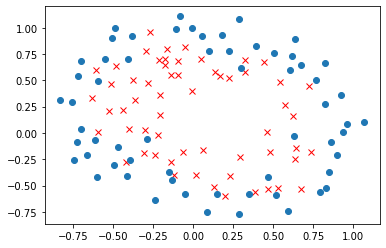

In [566]:
pl.plot(X.loc[(y==1).flatten(), 0], X.loc[(y==1).flatten(),1], 'rx')
pl.plot(X.loc[(y==0).flatten(), 0], X.loc[(y==0).flatten(),1], 'o')

In [567]:
def mapFeatures(X1,X2):
    m = X1.shape[0]
    degree = 6
    result = pd.DataFrame(np.ones(m))
    for i in range(1,degree+1):
        for j in range(i+1):
            result = pd.concat([result, (pd.DataFrame((X1**(i-j))*(X2**j)))], axis=1, ignore_index=True)
    return result

In [568]:
X = mapFeatures(X[0], X[1])
X.shape

(118, 28)

In [569]:
initial_theta = pd.DataFrame(np.zeros(X.shape[1]))
initial_theta.shape

(28, 1)

In [570]:
lmbda = 1

In [571]:
def costFunctionReg(theta, X, y,lbd):
    m = y.shape[0]
    r_s = sigmoid(X,theta)
    tta = pd.DataFrame(theta.copy())
    tta.iloc[0,0] = 0
    J = (1/m)*(-y.T.dot(np.log(r_s))-((1-y).T.dot(np.log(1-r_s))))[0]+(lbd/(2*m))*np.sum(tta**2)

    return J

In [572]:
def gradientDescentReg(theta, X, y, lbd):
    m = y.shape[0]
    r_s = sigmoid(X,theta)
    tta = pd.DataFrame(theta.copy())
    tta.iloc[0,0] = 0
    return pd.DataFrame((1/m)*(X.T.dot(r_s-y.reshape(m,1)))+(lbd/m)*tta).T

In [573]:
Jreg = costFunctionReg(initial_theta, X, y, lmbda)
Jreg

0    0.693147
dtype: float64

In [574]:
gradReg = gradientDescentReg(initial_theta, X, y, lmbda)
gradReg.iloc[0,:5]

0    0.008475
1    0.018788
2    0.000078
3    0.050345
4    0.011501
Name: 0, dtype: float64

In [575]:
test_theta = pd.DataFrame(np.ones(X.shape[1]))
test_theta.shape

(28, 1)

In [576]:
testJ = costFunctionReg(test_theta, X, y, 10)
testGrad = gradientDescentReg(test_theta, X, y, 10)
print(testJ, testGrad.iloc[0,:5])

0    3.164509
dtype: float64 0    0.346045
1    0.161352
2    0.194796
3    0.226863
4    0.092186
Name: 0, dtype: float64


In [577]:
initial_theta = pd.DataFrame(np.zeros(X.shape[1]))

initial_theta.shape

(28, 1)

In [578]:
new2_theta = fmin_tnc(func=costFunctionReg, x0=initial_theta, args=(X,y.flatten(),lmbda), fprime=gradientDescentReg)
new2_theta[0].shape

(28,)

In [591]:
predict = sigmoid(X,new2_theta[0]) >= 0.5
accuracy = np.mean(predict==y)
accuracy

0    0.830508
dtype: float64